# Fase 1: Exploración y Limpieza

## Exploración Inicial

In [140]:
#instalar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# carga de los 2 archivos
df_loyalty = pd.read_csv('Customer Loyalty History.csv')
df_activity = pd.read_csv('Customer Flight Activity.csv')

In [ ]:
#printeo las columnas de cada df
print(df_loyalty.columns)
print(df_activity.columns)

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [ ]:
#muestro el número de filas y columnas de ambos df
print("Shape:", df_loyalty.shape)
print("Shape:", df_activity.shape)

Shape: (16737, 16)
Shape: (405624, 10)


In [ ]:
#muestro las 5 primeras filas de cada df
print(df_loyalty.head())
print(df_activity.head())

   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cance

In [ ]:
#printeo las 5 últimas filas de ambos df
print(df_loyalty.tail())
print(df_activity.tail())

       Loyalty Number Country          Province        City Postal Code  \
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education   Salary Marital Status Loyalty Card       CLV  \
16732  Female   College      NaN        Married         Star  61850.19   
16733  Female  Bachelor  89210.0        Married         Star  67907.27   
16734    Male   College      NaN         Single         Star  74228.52   
16735    Male  Bachelor -57297.0        Married         Star  10018.66   
16736  Female  Bachelor  75049.0        Married         Star  83325.38   

      Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
16732        Standard    

In [ ]:
#muestro la información básica de cada df
print(df_loyalty.info())
print(df_activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [139]:
#printeo las estadísticas básicas de los 2 df y las transpongo
print(df_loyalty.describe().T)
print(df_activity.describe().T)

                      count           mean            std        min  \
Loyalty Number      16737.0  549735.880445  258912.132453  100018.00   
Salary              12499.0   79245.609409   35008.297285  -58486.00   
CLV                 16737.0    7988.896536    6860.982280    1898.01   
Enrollment Year     16737.0    2015.253211       1.979111    2012.00   
Enrollment Month    16737.0       6.669116       3.398958       1.00   
Cancellation Year    2067.0    2016.503145       1.380743    2013.00   
Cancellation Month   2067.0       6.962748       3.455297       1.00   

                          25%        50%        75%        max  
Loyalty Number      326603.00  550434.00  772019.00  999986.00  
Salary               59246.50   73455.00   88517.50  407228.00  
CLV                   3980.84    5780.18    8940.58   83325.38  
Enrollment Year       2014.00    2015.00    2017.00    2018.00  
Enrollment Month         4.00       7.00      10.00      12.00  
Cancellation Year     2016.00    

In [ ]:
#creo un nuevo df para hacer intersección interna por la columna 'Loyalty Number' porque es el identificador únco en ambos archivos
df = pd.merge(df_activity, df_loyalty, on='Loyalty Number', how='inner') #inner: mantiene las filas del mismo valor en ambos dataframes
print("Shape del dataframe unido:", df.shape)

Shape del dataframe unido: (405624, 25)


In [ ]:
#muestro las columnas del df unido
df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

## Limpieza de Datos

In [87]:
#comprobamos si hay filas duplicadas
print(df.duplicated().sum()) 

0


In [ ]:
#verificamos si hay nulos en las filas de las columnas
print(df.isnull().sum()) 

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     10959
Cancellation Month    10959
dtype: int64


In [ ]:
#eliminamos las filas con nulos en Salary 
df = df_loyalty.dropna(subset=['Salary'])
#comprobamos sumando de nuevo todos los nulos que queden
df.isnull().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [90]:
#usamos un booleano: False si es nulo
print(df['Salary'].notnull())

0        True
4        True
5        True
7        True
8        True
         ... 
16729    True
16730    True
16733    True
16735    True
16736    True
Name: Salary, Length: 12499, dtype: bool


In [91]:
#verificamos si salary es positivo porque el dinero no puede ser negativo
print(df['Salary'] > 0)  # True si es positivo

0         True
4         True
5         True
7         True
8         True
         ...  
16729     True
16730     True
16733     True
16735    False
16736     True
Name: Salary, Length: 12499, dtype: bool


In [ ]:
#rellenamos los nulos con 0 de las dos columnas para que no den errores en los años y meses
df_loyalty['Cancellation Year'] = df_loyalty['Cancellation Year'].fillna(0)
df_loyalty['Cancellation Month'] = df_loyalty['Cancellation Month'].fillna(0)
#comprobamos si quedan nulos
print(df['Cancellation Year'].isnull().sum())
print(df['Cancellation Month'].isnull().sum())

0
0


In [ ]:
#verificamos si son enteras todas las columnas que deberían serlo: int64
print(df['Cancellation Year'].dtype)
print(df['Cancellation Month'].dtype)
print(df['Enrollment Year'].dtype)
print(df['Enrollment Month'].dtype)
print(df['Cancellation Year'].dtype)
print(df['Cancellation Month'].dtype)

float64
float64
int64
int64
float64
float64


## Fase 2: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

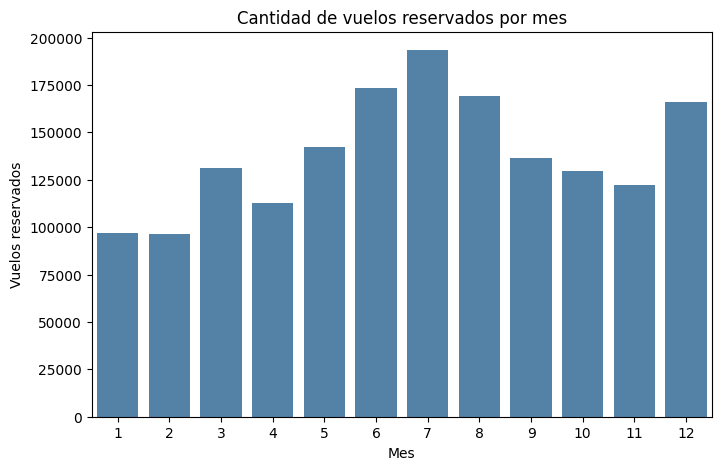

In [ ]:
# graficamos usando el df_activity y agrupamos por las columnas 'Flights Booked' y 'Month'
flights_per_month = df_activity.groupby('Month')['Flights Booked'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=flights_per_month.index, y=flights_per_month.values, color="steelblue", legend=False)
plt.title('Cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.show()

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

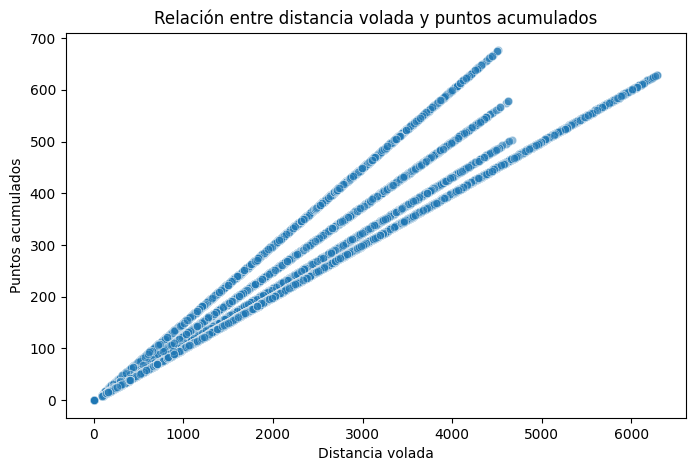

In [ ]:
# graficamos utilizando el df_activity y las columnas 'Distance' y 'Points Accumulated'
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_activity, x='Distance', y='Points Accumulated', alpha=0.5)
plt.title('Relación entre distancia volada y puntos acumulados')
plt.xlabel('Distancia volada')
plt.ylabel('Puntos acumulados')
plt.show()

3. ¿Cuál es la distribución de los clientes por provincia o estado?

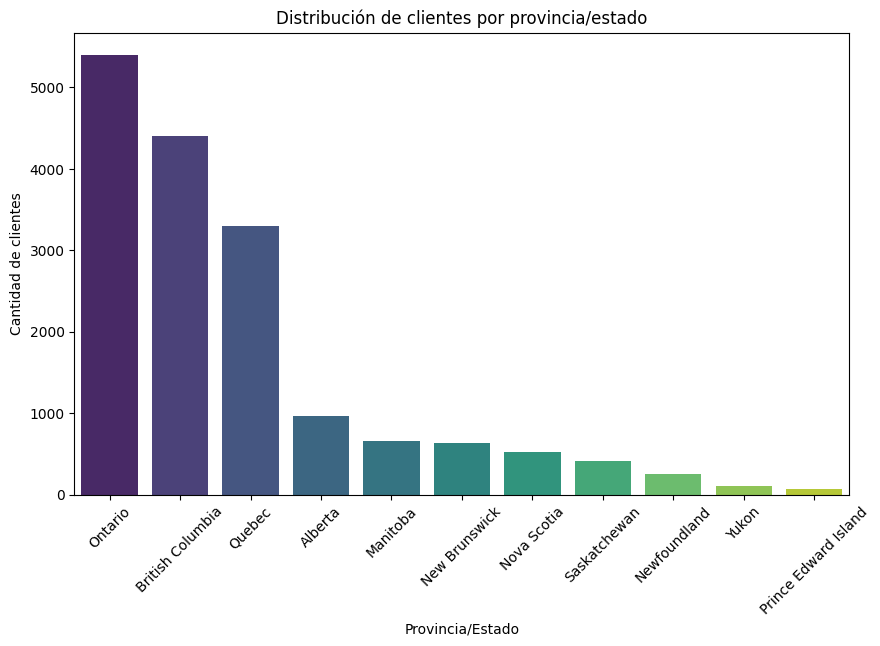

In [ ]:
# graficamos usando el df_loyalty y la columna 'Province'
clientes_por_provincia = df_loyalty['Province'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=clientes_por_provincia.index, y=clientes_por_provincia.values, palette="viridis")
plt.title('Distribución de clientes por provincia/estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

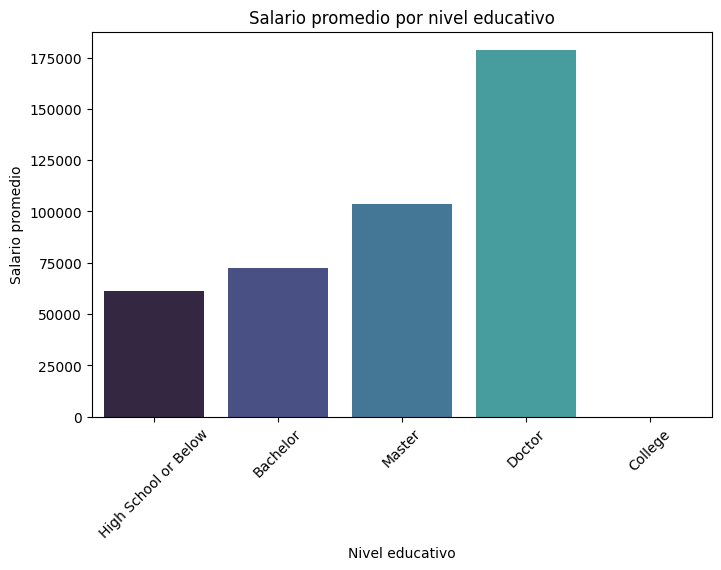

In [ ]:
# graficamos utilizando el df_loyalty y agrupamos por las columnas 'Education' y 'Salary'
salario_educacion = df_loyalty.groupby('Education')['Salary'].mean().sort_values() #ordena en ascendente
plt.figure(figsize=(8,5))
sns.barplot(x=salario_educacion.index, y=salario_educacion.values, palette="mako")
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#comprobamos que la columna 'College' ya no aparece porque eliminamos sus filas nulas en la limpieza 

Education
Bachelor                10475
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


In [123]:
#printeo la suma de valores nulos que hay en 'College' antes de limpiar
print(df_loyalty[df_loyalty['Education'] == 'College']['Salary'].isnull().sum())

4238


In [ ]:
# muestro la suma de valores nulos que hay en 'College' después de limpiar
print(df[df['Education'] == 'College']['Salary'].isnull().sum())

0


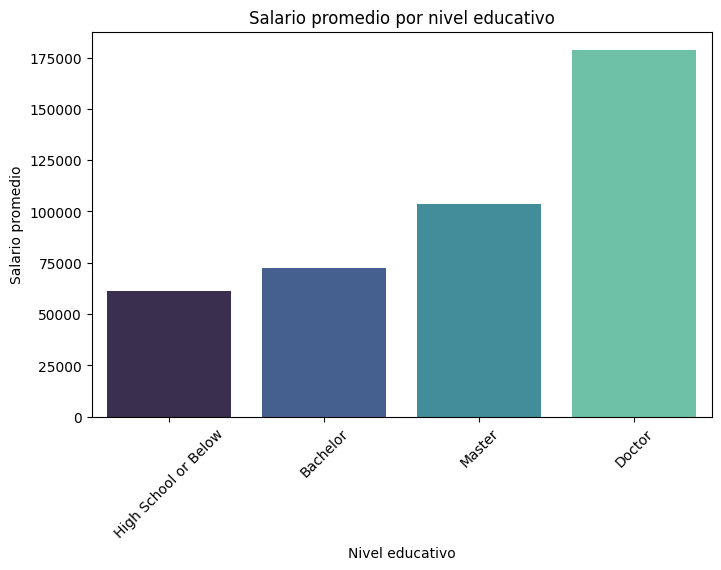

In [ ]:
# graficamos el código sin 'College'
salario_educacion = df_loyalty.groupby('Education')['Salary'].mean().sort_values().dropna() #ordena en ascendente y elimina NaN
plt.figure(figsize=(8,5))
sns.barplot(x=salario_educacion.index, y=salario_educacion.values, palette="mako")
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

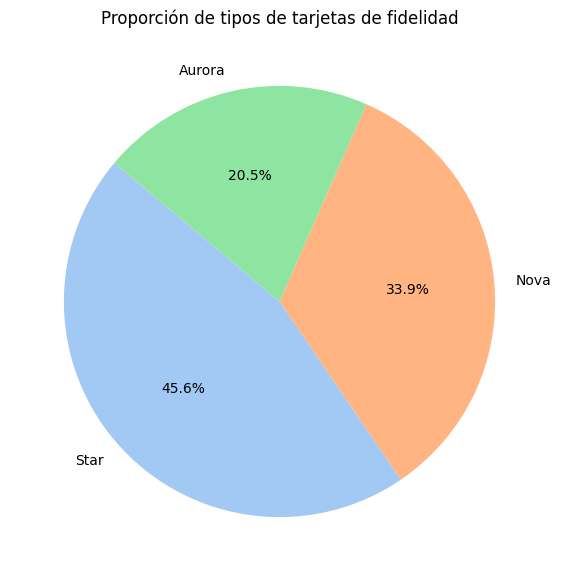

In [ ]:
# graficamos usando el df_loyalty y la columna 'Loyalty Card'
tarjetas = df_loyalty['Loyalty Card'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(tarjetas.values, labels=tarjetas.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de tipos de tarjetas de fidelidad')
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

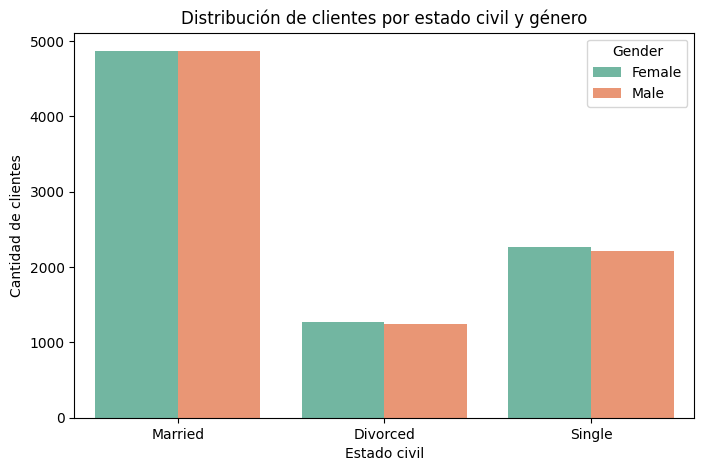

In [ ]:
# graficamos utilizando el df_loyalty y las columnas 'Marital Status' y 'Gender'
plt.figure(figsize=(8,5))
sns.countplot(data=df_loyalty, x='Marital Status', hue='Gender', palette="Set2") #hue separa las barras por la columna 'Gender'
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.show()

## Fase 3: BONUS

## 1. Preparación de Datos

¿Existe alguna relación entre el número de vuelos reservados y el nivel educativo?

In [ ]:
# creamos un nuevo DataFrame con las columnas relevantes para hacer intersección interna por la columna 'Loyalty Number' porque es el identificador únco en ambos archivos
df_merge = df_activity[['Loyalty Number', 'Flights Booked']].merge(df_loyalty[['Loyalty Number', 'Education']], on='Loyalty Number', how='left') #left une todas las filas de las 2 columnas de df_activity (a la izquierda) 
df_filtrado = df_merge[['Flights Booked', 'Education']] #filtro solo por las columnas 'Flights Booked' y 'Education'
print(df_filtrado.head())

   Flights Booked Education
0               3  Bachelor
1              10   College
2               6   College
3               0  Bachelor
4               0  Bachelor


## 2. Análisis Descriptivo

In [ ]:
# agrupamos por las 2 columnas para mostrar las estadísticas descriptivas básicas 
df_filtrado.groupby('Education')['Flights Booked'].describe() #no hace falta poner T.

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,253752.0,4.091093,5.216995,0.0,0.0,1.0,8.0,21.0
College,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0
Doctor,17856.0,4.146281,5.250093,0.0,0.0,1.0,8.0,21.0
High School or Below,19008.0,4.155777,5.234551,0.0,0.0,1.0,8.0,21.0
Master,12336.0,4.184014,5.210294,0.0,0.0,1.0,8.0,21.0


## 3. Prueba Estadística

In [176]:
# finalmente, hacemos una prueba de hipótesis con t de Student para comparar promedio de los vuelos reservados entre los sectores 'Doctor' y 'High School or Below'
grupo1 = df_filtrado[df_filtrado['Education'] == 'Doctor']['Flights Booked']
grupo2 = df_filtrado[df_filtrado['Education'] == 'High School or Below']['Flights Booked']

t_stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)
print("t-statistic:", round(t_stat, 2)) #redondeamos a 2 decimales
print("p-value:", round(p_value, 2))

t-statistic: -0.17
p-value: 0.86


El resultado de p-value es 0.86, lo que indica que no hay una diferencia significativa entre los vuelos reservados por ambos sectores al ser mayor que 0.05. Para determinar cuál reserva más tenemos t-statistic con -0.17, que al ser negativo señala que el primer sector (Doctor) lo hace menos que el segundo (High School or Below).

In [178]:
# y ahora la hacemos entre los sectores 'Master' y 'Bachelor'
grupo1 = df_filtrado[df_filtrado['Education'] == 'Master']['Flights Booked']
grupo2 = df_filtrado[df_filtrado['Education'] == 'Bachelor']['Flights Booked']

t_stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)
print("t-statistic:", round(t_stat, 2)) #redondeamos a 2 decimales
print("p-value:", round(p_value, 2))

t-statistic: 1.93
p-value: 0.05


Sin embargo, si luego comparamos los sectores 'Master' y 'Bachelor', nos da a entender que la diferencia es mayor que en el caso anterior porque p-value está en el límite (0.05). Y para saber cuál reserva más usamos de nuevo t-statistic, que al ser positivo señala que el primer sector (en este caso, 'Master') lo hace más que el segundo (en este caso, 'Bachelor').

### **En conclusión, la prueba de hipótesis realizada significa que no hay relación entre los diferentes sectores y las reservas realizadas porque a veces las hacen más los del nivel educativo superior y en otras ocasiones los del inferior.**